In [24]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import sounddevice as sd
import soundfile as sf
from time import sleep

In [2]:
fs = 8000 # Sample rate
def create_sin_waves(amp, freq, phase):
    '''
    A function to create sin wave
    '''
    t = 3 # signal length in second
    samples = np.linspace(0, t, int(fs*t), endpoint=False)
    signal = np.sin((2 * np.pi * freq + phase) * samples)
    return signal

    

### 1. Create a synthetic signal as a sum of sinusoids (1 point)

#### a) create sinusoids with chosen amplitudes and phases

In [3]:
freqs = [100, 500, 1500, 2500]
amps = [1.0, 0.75, 0.5, 0.25]
phases = [np.pi/4, np.pi/3, np.pi/2, np.pi]

sin_waves = []
for freq, amp, phase in zip(freqs, amps, phases):
    sin_waves.append(create_sin_waves(amp, freq, phase))
sin_waves = np.array(sin_waves)

#### b.1) Play sinusoids

In [26]:
for sin_wave in sin_waves:
    sd.play(sin_wave,fs)
    sleep(3.0)

#### b.2) Plot sinusoids (only first 200 samples are displayed for better visualization)

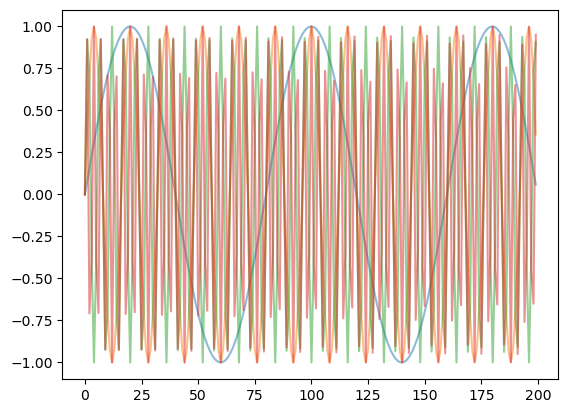

In [5]:
for sin_wave in sin_waves:
    plt.plot(sin_wave[:200], alpha=0.5)

#### c) Add them up to x(t). Plot and play x(t). Write the signal to a wav file.

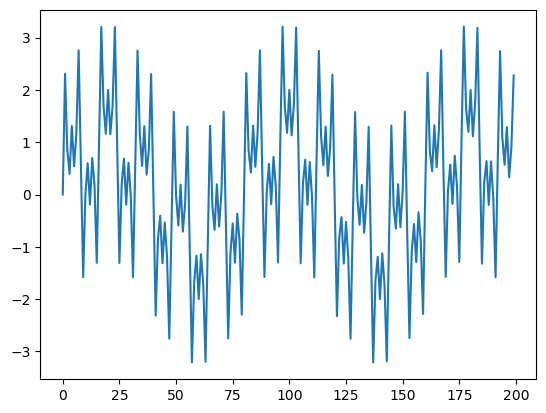

In [6]:
x = np.sum(sin_waves, axis=0)
plt.plot(x[:200])
sd.play(x, fs)
sf.write("x.wav", x, fs)

#### d) Apply DFT with nfft= 512

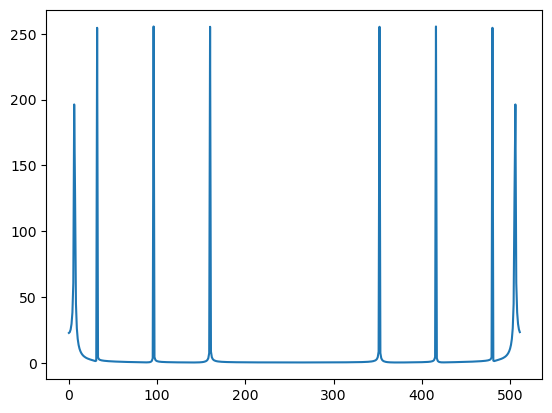

In [7]:
fft_512 = fft(x, 512)
fft_512_mag = np.abs(fft_512)
plt.plot(fft_512_mag)

#### d.1) Apply DFT with nfft= 258

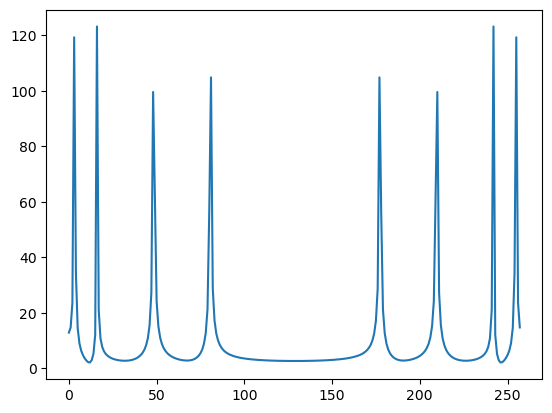

In [8]:
fft_258 = fft(x, 258)
fft_258_mag = np.abs(fft_258)
plt.plot(fft_258_mag)

#### d.2) Apply DFT with nfft= signal length

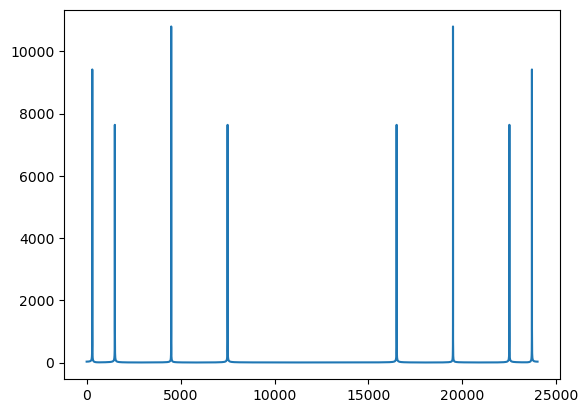

In [9]:
fft_sl = fft(x, x.shape[0])
fft_sl_mag = np.abs(fft_sl)
plt.plot(fft_sl_mag)

#### e) Observe the components and relationship between nfft and frequency in Hz. Report your observation

The nfft value is propotional to the frequency in FFT. The larger nfft will give larger frequency. For signal frequencies that are larger than nfft, it will be cut off.

### 2. Read an audio and observe the spectrum. (1 point)

#### a) Read 'audio1.wav' 

In [10]:
audio1, fs1 = sf.read("audio1.wav")

#### a.1) Play

In [11]:
sd.play(audio1, fs1)

In [12]:
audio1.shape

(145530,)

#### a.2) Plot

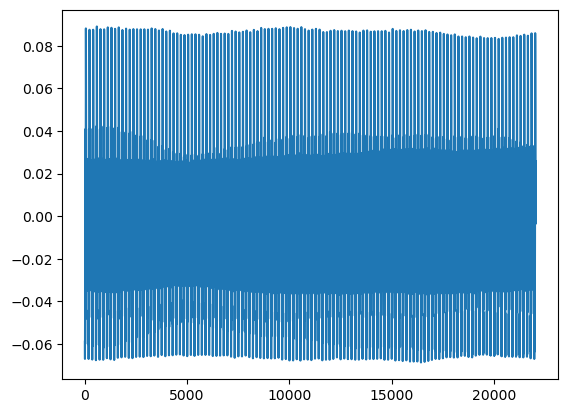

In [13]:
start, end = int(0.5*fs1), fs1
plt.plot(audio1[start:end])

#### a.3) Read 'audio2.wav' 

In [14]:
audio2, fs2 = sf.read("audio2.wav")

#### a.4) Play

In [15]:
sd.play(audio2, fs2)

#### a.5) Plot

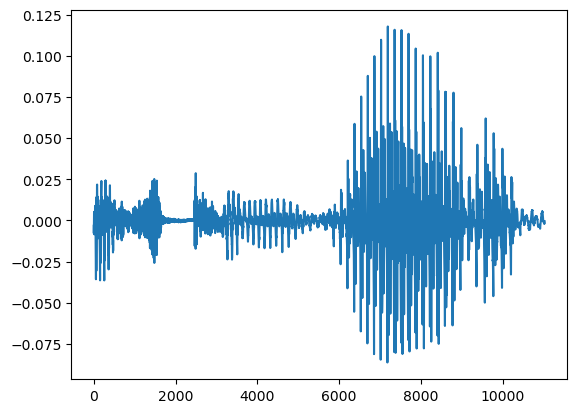

In [16]:
start, end = int(0.5*fs2), fs2
plt.plot(audio2[start:end])

#### c,d) Compute DFT in a loop for 'audio1.wav' 

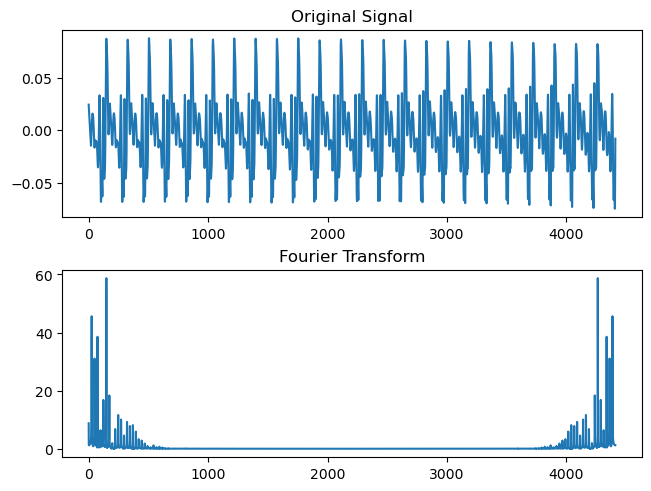

In [38]:
def dft_by_length(s, fs, curr_signal, time_length=0.1):
    interval = int(fs*time_length)
    s_ = s[curr_signal:curr_signal+interval]
    curr_signal += interval
    if (curr_signal >= s.shape[0]):
        curr_signal = 0
    
    s_dft = fft(s_)
    return curr_signal, s_, s_dft

curr_signal = fs1
run = 0
while (curr_signal != 0):
    curr_signal = max(curr_signal, 0)
    curr_signal, s_, s_dft = dft_by_length(audio1, fs1, curr_signal)
    if (run == 0):
        fig, (ax1, ax2) = plt.subplots(2, constrained_layout = True)
        ax1.plot(s_)
        ax1.title.set_text("Original Signal")
        ax2.plot(np.abs(s_dft))
        ax2.title.set_text("Fourier Transform")
        run = 1
        plt.show()

#### c,d) Compute DFT in a loop for 'audio2.wav' 

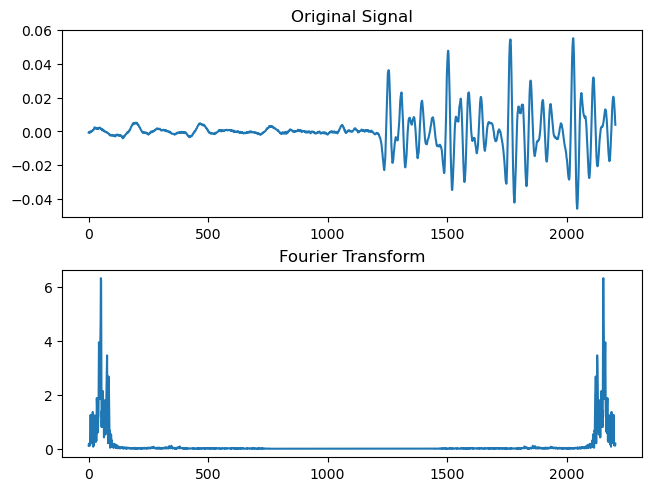

In [39]:
curr_signal = fs2
run = 0
while (curr_signal != 0):
    curr_signal = max(curr_signal, 0)
    curr_signal, s_, s_dft = dft_by_length(audio2, fs2, curr_signal)
    if (run == 0):
        fiig, (ax1, ax2) = plt.subplots(2, constrained_layout = True)
        ax1.plot(s_)
        ax1.title.set_text("Original Signal")
        ax2.plot(np.abs(s_dft))
        ax2.title.set_text("Fourier Transform")
        run=1
        plt.show()

#### e) How does the spectrum of these signals differ from that of sum of sinusoids? 

- For sinusoids, magnitude plot of fft only has samples at frequencies that we sample, these are pure tone.
- For audios' files signal, magnitude plot of fft has samples at more frequency, some are noises, so it will be more natural
- Furthermore, sinusoids doesn't have random noise and more repetitive than normal sound.

### Bonus problem:

In [19]:
from scipy.signal import resample

/home/trung/anaconda3/envs/study_env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


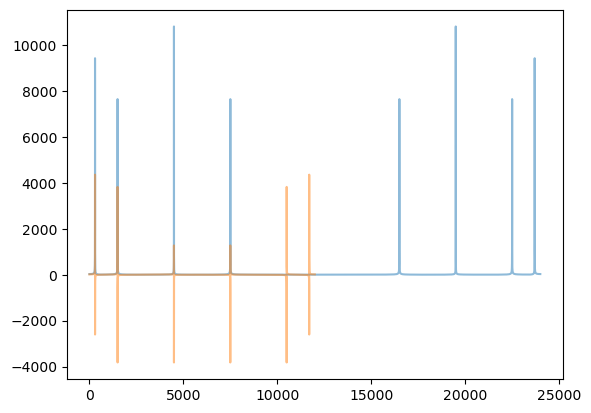

In [20]:
x_down2 = resample(x, x.shape[0]//2)
sf.write("x_down2.wav", x_down2, fs//2)
fft_x = fft(x)
fft_x_mag = np.abs(fft_x)
fft_x_down2 = fft(x_down2)
fft_x_down2_mag = np.abs(fft_x_down2)

plt.plot(fft_x_mag, alpha=0.5)
plt.plot(fft_x_down2, alpha=0.5)

Down sampling x by 2 will decrease the sampling frequency by 2. Aliasing will happen for frequency that is larger than new Nyquist frequency, which is 2000 Hz.